# Clustering

## 0. Data Prep

In [1]:
import pandas as pd

In [2]:
# read in the data
df = pd.read_csv('../Data/entertainment_clean.csv')
df

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6
...,...,...,...,...
145,Winifred,5.2,4.6,6.9
146,Xanthe,6.0,4.6,6.7
147,Zara,5.5,5.7,7.7
148,Zoe,0.0,6.1,5.2


In [3]:
# note the number of rows and columns
df.shape

(150, 4)

In [4]:
# check 1: is the data at the right row granularity? yes, each row is a student
df.name.nunique()

150

In [5]:
# check 2a: are the columns non-null?
df.isnull().sum()

name           0
books          0
tv_shows       0
video_games    0
dtype: int64

In [6]:
# check 2b: are the columns non-null?
df[df.isna().any(axis=1)]

,name,books,tv_shows,video_games


In [7]:
# check 3: are the columns numeric?
df.dtypes

name            object
books          float64
tv_shows       float64
video_games    float64
dtype: object

In [8]:
# check 4: engineer new features? not for now.

In [9]:
# check 5: select features? exclude the name column for modeling.
data = df.drop(columns='name')
data.head(3)

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0


In [10]:
# check 6: scale features? data is roughly all on a similar scale (for a distance-based calculation)
data.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


In [11]:
# the dataframe is ready for modeling!
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


## 1. Fit a K-Means Model

### i. K-Means Basics

In [12]:
# import kmeans from sklearn
from sklearn.cluster import KMeans

In [13]:
# fit a kmeans model with 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data)

KMeans(n_clusters=2, random_state=42)

In [14]:
# view the cluster labels
kmeans2.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [15]:
kmeans2.n_clusters, kmeans2.n_features_in_, kmeans2.cluster_centers_, kmeans2.labels_

(2,
 3,
 array([[0.596, 5.13 , 5.006],
        [4.192, 4.314, 6.262]]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0]))

### ii. Visualizing K-Means Clustering

In [16]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# combine the data and cluster labels
cluster_labels = pd.Series(kmeans2.labels_, name='cluster')

# create a combined dataframe (data & cluster labels)
df_clean = pd.concat([data, cluster_labels], axis=1)
df_clean.head() 

,books,tv_shows,video_games,cluster
0,0.5,4.6,4.9,0
1,0.0,4.5,4.8,0
2,0.5,4.5,5.0,0
3,3.5,4.5,6.6,1
4,2.8,3.8,5.6,1


### MatPlotLib Colormaps
https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [18]:
centroids2 = kmeans2.cluster_centers_
centroids2

array([[0.596, 5.13 , 5.006],
       [4.192, 4.314, 6.262]])

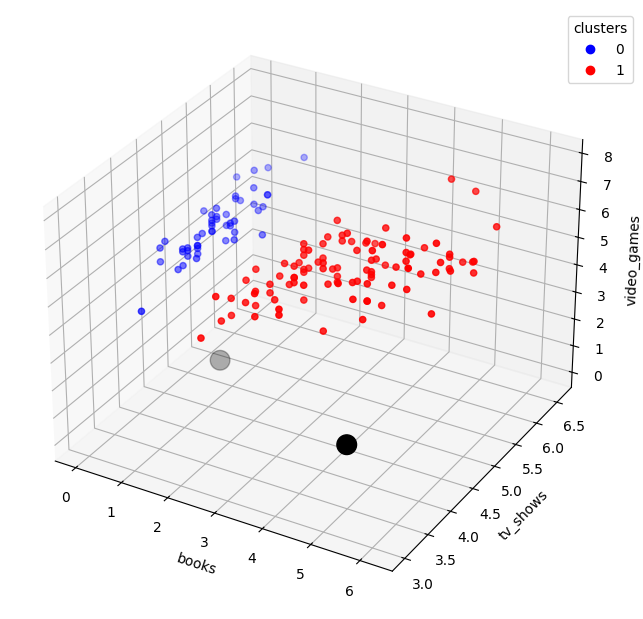

In [19]:
# create a 3d scatter plot
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
fig.add_axes(ax)

# specify the data and labels
sc = ax.scatter(df_clean['books'], df_clean['tv_shows'], df_clean['video_games'],
                c=df_clean['cluster'],   # color of each dot
                cmap='bwr') # 'tab10')   # colormap

# plot the centroids
ax.scatter(centroids2[:, 0], centroids2[:, 1], s=200, c='black')

ax.set_xlabel('books')
ax.set_ylabel('tv_shows')
ax.set_zlabel('video_games')

# print(sc.legend_elements())

# add a legend
plt.legend(*sc.legend_elements(), title='clusters', bbox_to_anchor=(1.05, 1)); 

### iii. Interpreting K-Means Clustering

In [20]:
# view the column names
data.columns

Index(['books', 'tv_shows', 'video_games'], dtype='object')

In [21]:
# view the cluster centers (centroids)
centroids2 = kmeans2.cluster_centers_
centroids2
# [book hours, tv show hours, video game hours]

array([[0.596, 5.13 , 5.006],
       [4.192, 4.314, 6.262]])

In [22]:
# check the mean of each column
data.mean()

books          2.993333
tv_shows       4.586000
video_games    5.843333
dtype: float64

Students in **Cluster 1** spend, on average:
* 0.6 hours reading books
* 5.1 hours watching tv shows
* 5 hours playing video games

Students in **Cluster 2** spend, on average:
* 4.2 hours reading books
* 4.3 hours watching tv shows 
* 6.3 hours playing video games

Let's name the clusters:
* Cluster 1: **Non-readers**
* Cluster 2: **Entertainment enthusiasts**

### Fit a kmeans model with 3 clusters

In [23]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data)

KMeans(n_clusters=3, random_state=42)

In [24]:
# view the cluster labels
kmeans3.labels_

array([0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0])

In [25]:
# view the cluster centers
centroids3 = kmeans3.cluster_centers_
centroids3

array([[0.596     , 5.13      , 5.006     ],
       [5.14375   , 4.52708333, 6.63958333],
       [3.31346154, 4.11730769, 5.91346154]])

In [26]:
# view the cluster centers in a dataframe
cluster_centers3 = pd.DataFrame(centroids3, columns=data.columns)
cluster_centers3

,books,tv_shows,video_games
0,0.596000,5.130000,5.006000
1,5.143750,4.527083,6.639583
2,3.313462,4.117308,5.913462


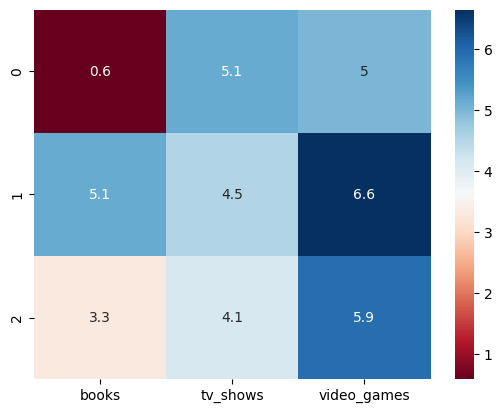

In [27]:
# view the cluster centers in a heatmap
import seaborn as sns
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

Name the clusters:

* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

## 2. Inertia Plot

In [28]:
# view previous inertia values
kmeans2.inertia_, kmeans3.inertia_

(206.44200000000004, 105.47568525641029)

In [29]:
# create an empty list to hold the inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)
inertia_values

[206.44200000000004,
 105.47568525641029,
 93.5153090659341,
 70.15778305028307,
 60.404557575757586,
 55.95111798900164,
 55.52002215876229,
 45.48421550671552,
 42.532413766788764,
 37.06426802364303,
 35.84139714452215,
 35.1140574009324,
 32.7026974251239,
 30.524871794871792]

In [30]:
# turn the list into a series for plotting
# change the index to map to the value of 'k'
inertia_series = pd.Series(inertia_values, index=range(2, 16))
inertia_series

2     206.442000
3     105.475685
4      93.515309
5      70.157783
6      60.404558
7      55.951118
8      55.520022
9      45.484216
10     42.532414
11     37.064268
12     35.841397
13     35.114057
14     32.702697
15     30.524872
dtype: float64

In [31]:
data.shape

(150, 3)

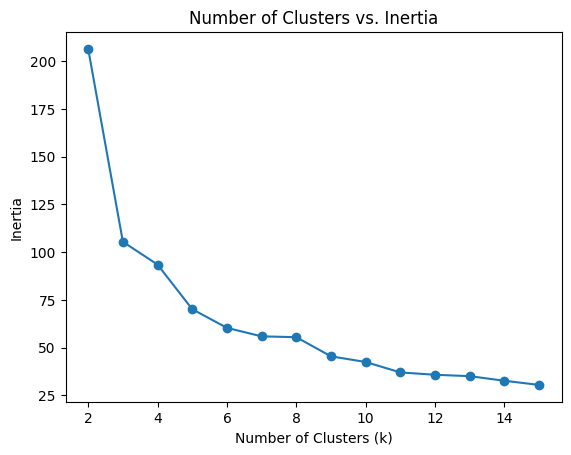

In [32]:
# plot the inertia values
import matplotlib.pyplot as plt

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

**Insight from the inertia plot**: 3 and 5 clusters both seem to be elbows - let's dive into both of them

Remember our 3 clusters:

* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

In [33]:
# now for 5 clusters
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data)

KMeans(n_clusters=5, random_state=42)

In [34]:
# view the cluster centers in a dataframe
cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data.columns)
cluster_centers5

,books,tv_shows,video_games
0,0.685714,5.814286,5.378571
1,4.148718,4.392308,6.335897
2,3.087879,3.909091,5.657576
3,0.561111,4.863889,4.861111
4,5.553571,4.682143,6.871429


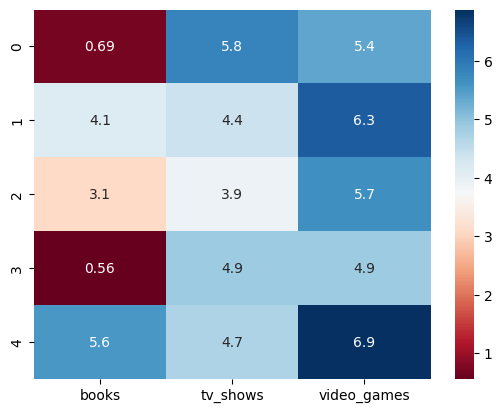

In [35]:
# view the cluster centers in a heatmap
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

A lot of the clusters are similar, and we could potentially combine some clusters together (note: this would give us a different result than if we did 3 clusters).

**Conclusion**: 3 clusters seem to capture patterns in the data, without being too complex. This is our best model for now.

Remember our 3 clusters:

* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

## 3. Tune the K-Means Model

In [36]:
# read in the prepped data (engineered and standardized features) from the last section
data_v2 = pd.read_pickle('../Data/entertainment_data_for_modeling.pkl')
data_v2.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


In [37]:
# create 2 - 15 clusters, and add the inertia scores to the list
inertia_values_v2 = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_v2)
    inertia_values_v2.append(kmeans.inertia_)
inertia_values_v2

[204.33069953033646,
 48.76849100259707,
 23.081405817631236,
 19.969745346967265,
 14.544204399086382,
 13.149474009661276,
 10.776480219489617,
 8.899026602409876,
 7.97032581971977,
 7.475023819085276,
 6.245887490162982,
 5.957877038771974,
 5.5330102147941265,
 5.120263895769977]

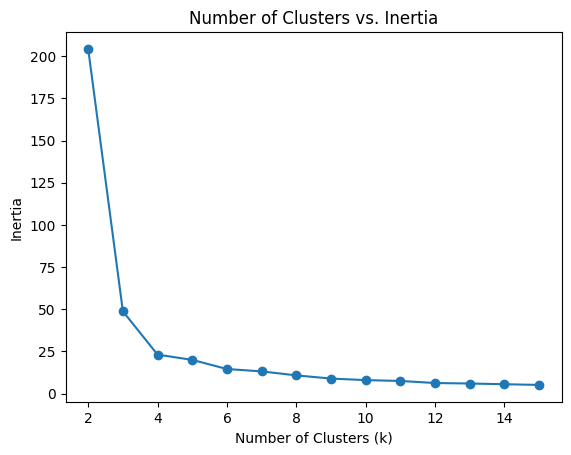

In [38]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series_v2 = pd.Series(inertia_values_v2, index=range(2, 16))

# plot the data
inertia_series_v2.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia"); 

In [39]:
# let's try 4 clusters
kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans4.fit(data_v2)

KMeans(n_clusters=4, random_state=42)

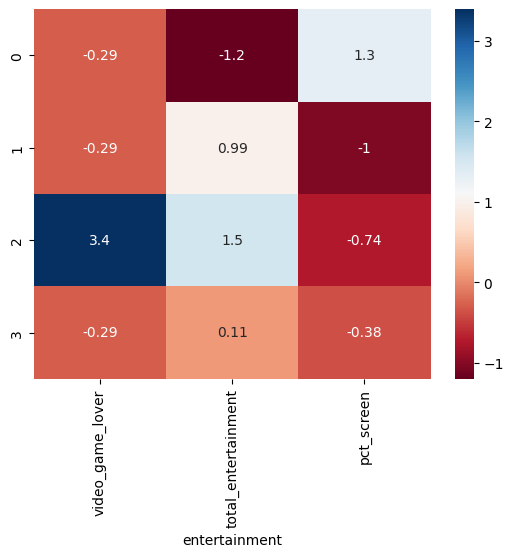

In [40]:
# view the cluster centers in a heatmap
cluster_centers4_v2 = pd.DataFrame(kmeans4.cluster_centers_, columns=data_v2.columns)
sns.heatmap(cluster_centers4_v2, cmap='RdBu', annot=True);

Name the clusters:

* Cluster 0: **Less entertainment, especially books**
* Cluster 1: **Prefer books to screens**
* Cluster 2: **Entertainment enthusiasts, especially video games**
* Cluster 3: **Typical students**

In [41]:
# view some students from cluster 0 - few books
data[kmeans4.labels_==0].head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
8,0.0,4.6,4.9
11,0.5,4.8,4.7


In [42]:
# view some students from cluster 2 - lots of video games
data[kmeans4.labels_==2].head()

,books,tv_shows,video_games
19,5.8,3.9,7.7
29,6.2,5.4,7.2
31,4.5,4.4,7.3
49,5.0,4.2,7.7
50,5.2,4.5,7.1


## 4. Select the Best K-Means Model

### a. Comparing cluster assignments

The three clusters created from the original data set (books, tv_shows, movies):
* Cluster 0: **Non-readers**
* Cluster 1: **Entertainment enthusiasts**
* Cluster 2: **Prefer video games to books**

The four clusters created from the updated data set (video_game_lover, total_entertainmnet, pct_screen):
* Cluster 0: **Less entertainment, especially books**
* Cluster 1: **Prefer books to screens**
* Cluster 2: **Entertainment enthusiasts, especially video games**
* Cluster 3: **Typical students**

In [46]:
# model 1: assign the cluster name to each row (replace numbers with text)
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({0: 'Non-Readers',
                                    1: 'Entertainment Enthusiasts',
                                    2: 'Prefer Video Games to Books'})
model1_names.head()

0                    Non-Readers
1                    Non-Readers
2                    Non-Readers
3    Prefer Video Games to Books
4    Prefer Video Games to Books
Name: model1_clusters, dtype: object

In [47]:
# view the number of students in each cluster for model 1
model1_names.value_counts()

model1_clusters
Prefer Video Games to Books    52
Non-Readers                    50
Entertainment Enthusiasts      48
Name: count, dtype: int64

In [48]:
# model 2: assign the cluster name to each row (replace numbers with text)
model2_clusters = pd.Series(kmeans4.labels_, name='model2_clusters')
model2_names = model2_clusters.map({0: 'Less Entertainment (Few Books)',
                                    1: 'Prefer Books to Screens',
                                    2: 'Entertainment Enthusiasts (Many Video Games)',
                                    3: 'Typical Students'})
model2_names.head()

0    Less Entertainment (Few Books)
1    Less Entertainment (Few Books)
2    Less Entertainment (Few Books)
3                  Typical Students
4                  Typical Students
Name: model2_clusters, dtype: object

In [49]:
# view the number of students in each cluster for model 2
model2_names.value_counts()

model2_clusters
Typical Students                                52
Less Entertainment (Few Books)                  50
Prefer Books to Screens                         36
Entertainment Enthusiasts (Many Video Games)    12
Name: count, dtype: int64

**Conclusion**: The first model seems to split the students into evenly-sized clusters, while the second model seems to label more students as typical, and then fewer as -books, -screens or +video games. Depending on what our goal is, we would pick the model that fits the goal.

### b. Comparing individual rows within the clusters

In [51]:
# combine the cluster names with the original data set
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)
cluster_names

,name,books,tv_shows,video_games,model1_clusters,model2_clusters
0,Aaliyah,0.5,4.6,4.9,Non-Readers,Less Entertainment (Few Books)
1,Abigail,0.0,4.5,4.8,Non-Readers,Less Entertainment (Few Books)
2,Addison,0.5,4.5,5.0,Non-Readers,Less Entertainment (Few Books)
3,Adeline,3.5,4.5,6.6,Prefer Video Games to Books,Typical Students
4,Alana,2.8,3.8,5.6,Prefer Video Games to Books,Typical Students
...,...,...,...,...,...,...
145,Winifred,5.2,4.6,6.9,Entertainment Enthusiasts,Prefer Books to Screens
146,Xanthe,6.0,4.6,6.7,Entertainment Enthusiasts,Prefer Books to Screens
147,Zara,5.5,5.7,7.7,Entertainment Enthusiasts,Entertainment Enthusiasts (Many Video Games)
148,Zoe,0.0,6.1,5.2,Non-Readers,Less Entertainment (Few Books)


In [52]:
# compare the cluster assignments and means of both models - find the unique combos of differences
(cluster_names.groupby(['model1_clusters', 'model2_clusters'])
                      [['books', 'tv_shows', 'video_games']]
              .mean())

books  \
model1_clusters             model2_clusters                                          
Entertainment Enthusiasts   Entertainment Enthusiasts (Many Video Games)  5.125000   
                            Prefer Books to Screens                       5.150000   
Non-Readers                 Less Entertainment (Few Books)                0.596000   
Prefer Video Games to Books Typical Students                              3.313462   

                                                                          tv_shows  \
model1_clusters             model2_clusters                                          
Entertainment Enthusiasts   Entertainment Enthusiasts (Many Video Games)  4.691667   
                            Prefer Books to Screens                       4.472222   
Non-Readers                 Less Entertainment (Few Books)                5.130000   
Prefer Video Games to Books Typical Students                              4.117308   

                                                                          video_games  
model1_clusters             model2_clusters                                            
Entertainment Enthusiasts   Entertainment Enthusiasts (Many Video Games)     7.475000  
                            Prefer Books to Screens                          6.361111  
Non-Readers                 Less Entertainment (Few Books)                   5.006000  
Prefer Video Games to Books Typical Students                                 5.913462

**Conclusion**: Looking at what model 1 called "enthusiasts", there isn't a huge difference between model 2's "enthusiast" and "less screens" labels.

### c. Remembering the original goal

**Goal**: The local library is starting an initiative to encourage teenagers to read more, and would like to market it differently to various segments of teenagers 

**Model 1**:
* Cluster 0: **Non-readers** (50)
* Cluster 1: **Entertainment enthusiasts** (48)
* Cluster 2: **Prefer video games to books** (52)
    
**Model 2**:
* Cluster 0: **Less entertainment, especially books** (50)
* Cluster 1: **Less screens** (36)
* Cluster 2: **Entertainment enthusiasts, especially video games** (12)
* Cluster 3: **Typical students** (52)

**Conclusion**: In this situation, looking at a combination of the results of both models, the recommendation could be to create:
1. A general ad for the typical teen
2. An ad targeted towards teens who don't read very much
3. An ad targeted towards teens who love video games

## 5. Hierarchical Clustering

### a. Hierarchical clustering on the original data

In [41]:
# view the data
data.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


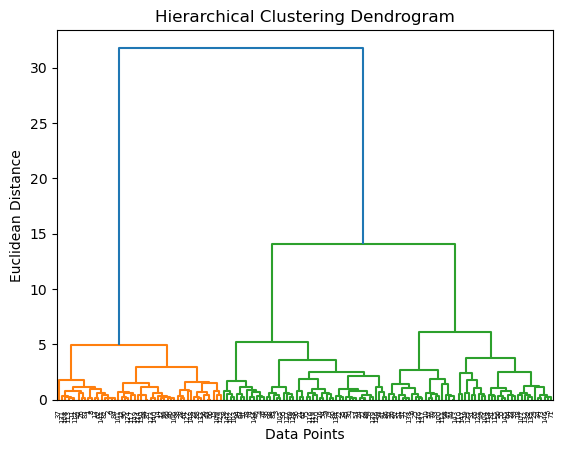

In [42]:
# visualize the clusters with a dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

**Conclusion**: Upon visual inspection, there are clearly three clusters. Update the color threshold to 10.

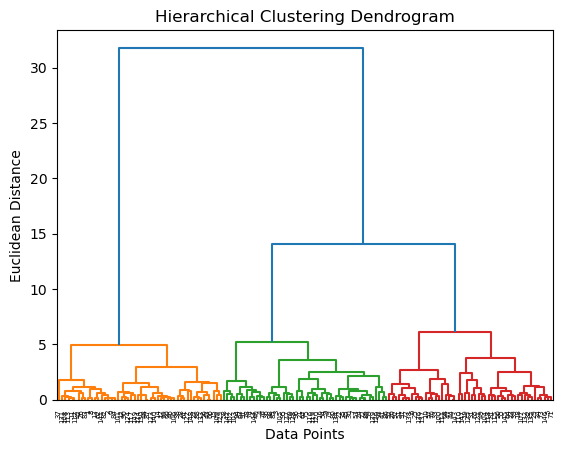

In [43]:
# visualize the clusters with a dendrogram with color_threshold = 10
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=10)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [44]:
# hierarchical clustering with sklearn, with 3 clusters
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(3)
agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [45]:
# view the 3 cluster labels
agg.labels_

array([1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1])

In [46]:
# view the value counts
from collections import Counter

Counter(agg.labels_)

Counter({1: 50, 2: 50, 0: 50})

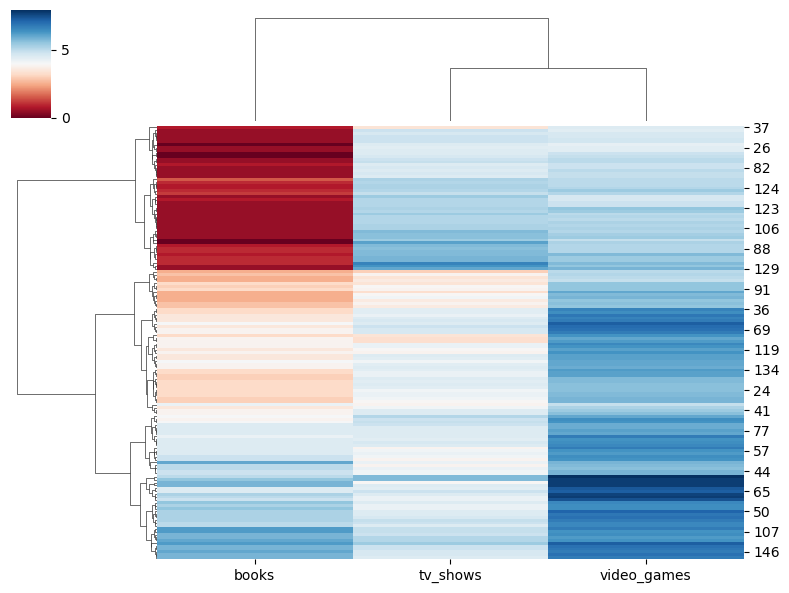

In [47]:
# create a cluster map
clustermap = sns.clustermap(data, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns)
plt.show()

* Cluster A: **Non-Readers**
* Cluster B: **Typical Students**
* Cluster C: **Video Game Lovers**

### b. Hierarchical clustering on the engineered data

In [48]:
# view the data
data_v2.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


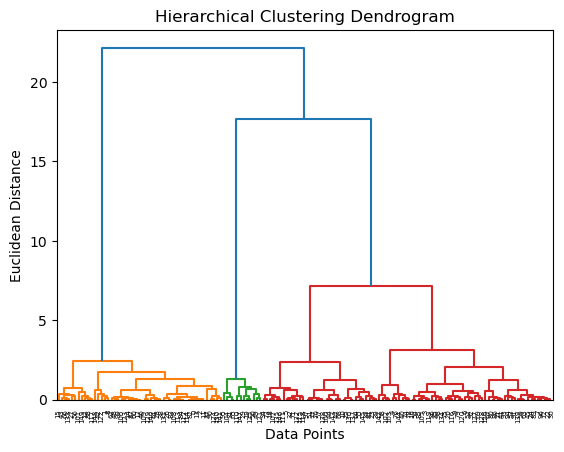

In [49]:
# visualize the clusters with a dendrogram
linkage_matrix_v2 = linkage(data_v2, method='ward')
dendrogram_info_v2 = dendrogram(linkage_matrix_v2, )

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

**Conclusion**: Upon visual inspection, there seem to be 4 clusters. Update the color threshold to 5.

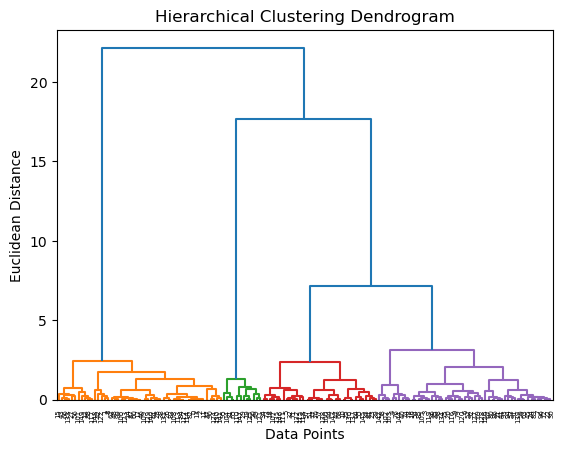

In [50]:
# visualize the clusters with a dendrogram
linkage_matrix_v2 = linkage(data_v2, method='ward')
dendrogram_info_v2 = dendrogram(linkage_matrix_v2, color_threshold=5)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [51]:
# hierarchical clustering with sklearn, with 4 clusters
agg_v2 = AgglomerativeClustering(4)
agg_v2.fit(data_v2)

AgglomerativeClustering(n_clusters=4)

In [52]:
# view the 4 cluster labels
agg_v2.labels_

array([1, 1, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 3, 2, 0, 0,
       0, 3, 0, 3, 1, 1, 1, 2, 0, 2, 3, 3, 3, 0, 0, 1, 1, 3, 0, 0, 1, 1,
       3, 0, 1, 3, 1, 2, 2, 3, 0, 0, 0, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 2,
       1, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 2, 0, 3, 0, 1, 3, 1, 0, 0, 2, 0, 1, 3, 1, 1,
       2, 3, 1, 1, 1, 3, 0, 1, 3, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1,
       3, 1, 0, 3, 3, 3, 3, 0, 1, 1, 0, 3, 0, 3, 3, 2, 1, 1])

In [53]:
# view the value counts
Counter(agg_v2.labels_)

Counter({0: 53, 1: 50, 3: 35, 2: 12})

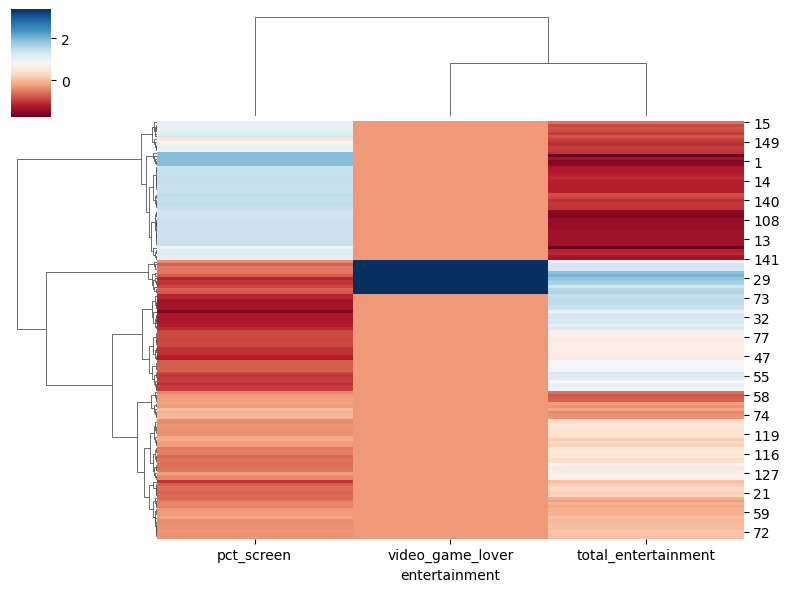

In [54]:
# create a cluster map
clustermap_v2 = sns.clustermap(data_v2, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_v2.columns)
plt.show()

* Cluster A: **Less Entertainment**
* Cluster B: **Video Game Lovers**
* Cluster C: **More Books**
* Cluster D: **Typical Students**

### c. View the cluster assignments from the visualizations

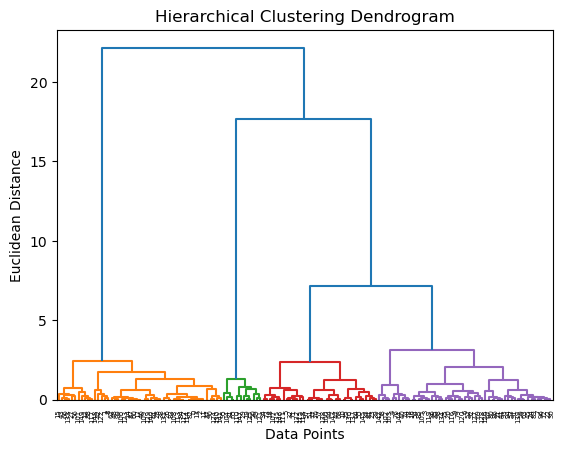

In [55]:
# visualize the clusters with a dendrogram
linkage_matrix_v2 = linkage(data_v2, method='ward')
dendrogram_info_v2 = dendrogram(linkage_matrix_v2, color_threshold=5)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [56]:
# get the x-axis values from the dendrogram (ivl = index variable list)
data_points = pd.Series(dendrogram_info_v2['ivl'], name='Data Point').astype('int')
data_points.head()

0     15
1     43
2     66
3    133
4     27
Name: Data Point, dtype: int64

In [57]:
# get the clusters from the dendrogram (fcluster = flat cluster)
from scipy.cluster.hierarchy import fcluster

den_clusters = pd.Series(fcluster(linkage_matrix_v2, 5, criterion='distance'), name='Dendrogram Cluster')
den_clusters.head()

0    1
1    1
2    1
3    4
4    4
Name: Dendrogram Cluster, dtype: int32

In [58]:
# view the cluster assignments from the dendrogram
den_clusters_df = den_clusters.reset_index()
den_clusters_df.columns = ['Data Point', 'Dendrogram Cluster']
den_clusters_df.head()

,Data Point,Dendrogram Cluster
0,0,1
1,1,1
2,2,1
3,3,4
4,4,4


In [59]:
# view the data points within each cluster (sorted)
den_clusters_df.sort_values(['Dendrogram Cluster', 'Data Point'])

,Data Point,Dendrogram Cluster
0,0,1
1,1,1
2,2,1
8,8,1
11,11,1
...,...,...
128,128,4
134,134,4
139,139,4
142,142,4


In [60]:
# view the number of data points within each cluster
den_clusters_df['Dendrogram Cluster'].value_counts()

Dendrogram Cluster
4    53
1    50
3    35
2    12
Name: count, dtype: int64

## 6. DBSCAN

### a. DBSCAN Basics

In [61]:
# import dbscan from sklearn
from sklearn.cluster import DBSCAN

In [62]:
# fit a dbscan model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

DBSCAN()

In [63]:
# view the cluster assignments
dbscan.labels_

array([ 0, -1,  0,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,  0,  0, -1,  1,
        0,  1, -1,  1, -1,  1,  1,  1,  1,  0,  0,  0, -1,  1, -1,  1,  1,
        1,  1,  1, -1,  0,  1,  1,  1, -1,  0, -1,  1,  0, -1,  0, -1,  1,
        1, -1,  1,  1,  1,  0,  1, -1,  1,  0,  0,  0,  1,  1, -1,  0, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  0,
       -1,  1, -1,  1,  0,  1,  0, -1, -1, -1,  0,  0,  0,  1,  1,  0,  1,
        1,  1, -1, -1,  0,  0, -1, -1,  1,  1,  0,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  1,  0,  0,  1, -1,  1,  1,  1, -1, -1,  0])

In [64]:
# number of clusters in labels, ignoring noise points
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_clusters_

2

In [65]:
# silhouette score of the model
from sklearn.metrics import silhouette_score

silhouette_score(data, dbscan.labels_, metric='euclidean', sample_size=None)

0.3419620951011187

In [66]:
# loop through many values of epsilon and min_samples
import numpy as np

results = []

# define a range of eps and min_samples values to loop through
eps_values = np.arange(.1, 2, .1)
min_samples_values = np.arange(2, 10, 1)

# loop through the combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        labels = dbscan.labels_
        
        # count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # count the number of noise points (labeled as -1)
        n_noise = list(labels).count(-1)
        
        # calculate the silhouette score
        if n_clusters > 1:  # silhouette score requires at least 2 clusters
            silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
        else:
            silhouette = None
        
        results.append([eps, min_samples, n_clusters, n_noise, silhouette])

# put the results in a dataframe
dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                "Number of Noise Points", "Silhouette Score"])
dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [67]:
# view the silhouette scores (higher is better)
dbscan_results.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
109,1.4,7,2,0,0.628673
107,1.4,5,2,0,0.628673
106,1.4,4,2,0,0.628673
105,1.4,3,2,0,0.628673
...,...,...,...,...,...
147,1.9,5,1,0,NaN
148,1.9,6,1,0,NaN
149,1.9,7,1,0,NaN
150,1.9,8,1,0,NaN


In [68]:
# view only the top result for each silhouette score
(dbscan_results.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
76,1.0,6,2,2,0.550831
79,1.0,9,2,3,0.528540
72,1.0,2,2,1,0.515323
57,0.8,3,2,4,0.497686


DBSCAN seems to have detected two clusters.

### b. DBSCAN Steps within a Function

In [69]:
# put the entire process into a function
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def tune_dbscan(data):

    results = []

    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)

    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [70]:
# view the results on the original data
dbscan_results_1 = tune_dbscan(data)
dbscan_results_1.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,12,124,-0.438782
1,0.1,3,2,144,-0.483479
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [71]:
# view the results on the engineered data
dbscan_results_2 = tune_dbscan(data_v2)
dbscan_results_2.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,25,36,0.209512
1,0.1,3,14,58,0.080184
2,0.1,4,8,84,-0.072472
3,0.1,5,5,97,-0.130030
4,0.1,6,4,104,-0.188572


In [72]:
# top results for data
(dbscan_results_1.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
127,1.6,9,2,0,0.628673
76,1.0,6,2,2,0.550831
79,1.0,9,2,3,0.528540
72,1.0,2,2,1,0.515323
57,0.8,3,2,4,0.497686


In [73]:
# top results for data_v2
(dbscan_results_2.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
45,0.6,7,3,0,0.734752
39,0.5,9,3,3,0.691331
29,0.4,7,3,7,0.654354
27,0.4,5,3,6,0.652730
113,1.5,3,2,0,0.647356


In [74]:
# DBSCAN with three clusters
dbscan_v2 = DBSCAN(eps=0.6, min_samples=7)
dbscan_v2.fit(data_v2)

DBSCAN(eps=0.6, min_samples=7)

In [75]:
# view the 3 cluster labels
dbscan_v2.labels_

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0])

In [76]:
# view the value counts
Counter(dbscan_v2.labels_)

Counter({1: 88, 0: 50, 2: 12})

## 7. Comparing Models

### a. Best Models

In [77]:
# best kmeans model: 4 clusters on engineered data
kmeans_final = pd.Series(kmeans4.labels_, name='kmeans')
kmeans_final_clusters = kmeans_final.map({0: 'Less Entertainment, Especially Books',
                                          1: 'Less Screens',
                                          2: 'More Entertainment, Especially Video Games',
                                          3: 'Typical Students'})
kmeans_final_clusters.head()

0    Less Entertainment, Especially Books
1    Less Entertainment, Especially Books
2    Less Entertainment, Especially Books
3                        Typical Students
4                        Typical Students
Name: kmeans, dtype: object

In [78]:
# best hierarchical model: 4 clusters on engineered data
hier_final = pd.Series(agg_v2.labels_, name='hierarchical')
hier_final.head()

0    1
1    1
2    1
3    0
4    0
Name: hierarchical, dtype: int64

In [79]:
# best dbscan model: 3 clusters on engineered data
dbscan_final = pd.Series(dbscan_v2.labels_, name='dbscan')
dbscan_final.head()

0    0
1    0
2    0
3    1
4    1
Name: dbscan, dtype: int64

### ii. Compare Number of Clusters

In [80]:
kmeans_final.value_counts()

kmeans
3    52
0    50
1    36
2    12
Name: count, dtype: int64

In [81]:
hier_final.value_counts()

hierarchical
0    53
1    50
3    35
2    12
Name: count, dtype: int64

In [82]:
dbscan_final.value_counts()

dbscan
1    88
0    50
2    12
Name: count, dtype: int64

### iii. Compare Silhouette Scores

In [83]:
silhouette_score(data_v2, kmeans4.labels_)

0.6391928370218308

In [84]:
silhouette_score(data_v2, agg_v2.labels_)

0.6368911098386921

In [85]:
silhouette_score(data_v2, dbscan_v2.labels_)

0.7347522519290408

**Conclusion**: In this situation, I would choose one of two routes:

* If the goal is to have a high-performing model, I would choose the DBSCAN results because it has the highest silhouette score with the fewest clusters (simplest model)
* If the goal is more for interpretability, I would choose the K-Means results because we're able to interpret and name the cluster centers

## 8. Labeling Unseen Data

**Goal**: Make predictions based on the final K-Means model (4 clusters on the scaled data)

### Step 1: Review the Data Prep Steps

In [86]:
# take a look at the original data set
ent = pd.read_excel('../Data/entertainment.xlsx')
ent = ent.pivot(index='name', columns='entertainment', values='hours_per_week').reset_index()
ent = ent.fillna(0)
ent.head()

entertainment,name,books,movies,tv_shows,video_games
0,Aaliyah,0.5,1.5,4.6,4.9
1,Abigail,0.0,1.4,4.5,4.8
2,Addison,0.5,1.6,4.5,5.0
3,Adeline,3.5,4.4,4.5,6.6
4,Alana,2.8,3.9,3.8,5.6


In [87]:
# remember the new fields that we created
ent['video_game_lover'] = np.where(ent.video_games > 7, 1, 0)
ent['total_entertainment'] = ent.books + ent.movies + ent.tv_shows + ent.video_games
ent['pct_screen'] = (ent.movies + ent.tv_shows + ent.video_games) / ent.total_entertainment
ent.head()

entertainment,name,books,movies,tv_shows,video_games,video_game_lover,total_entertainment,pct_screen
0,Aaliyah,0.5,1.5,4.6,4.9,0,11.5,0.956522
1,Abigail,0.0,1.4,4.5,4.8,0,10.7,1.000000
2,Addison,0.5,1.6,4.5,5.0,0,11.6,0.956897
3,Adeline,3.5,4.4,4.5,6.6,0,19.0,0.815789
4,Alana,2.8,3.9,3.8,5.6,0,16.1,0.826087


In [88]:
# remember the fields that we selected
ent_subset = ent[['video_game_lover', 'total_entertainment', 'pct_screen']]
ent_subset.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,0,11.5,0.956522
1,0,10.7,1.000000
2,0,11.6,0.956897
3,0,19.0,0.815789
4,0,16.1,0.826087


In [89]:
# remember the scaling that we applied
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
standardized = std_scaler.fit_transform(ent_subset)
ent_scaled = pd.DataFrame(standardized, columns=ent_subset.columns)
ent_scaled.head()

entertainment,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-1.360056,1.384262
1,-0.294884,-1.551591,1.918235
2,-0.294884,-1.336114,1.388865
3,-0.294884,0.435582,-0.344126
4,-0.294884,-0.258731,-0.217658


### Step 2: Apply The Same Data Prep to the New Students

In [90]:
# student 1: consumes no entertainment
student1 = pd.DataFrame([np.array([0, 0, 0, 0])], columns=['books', 'movies', 'tv_shows', 'video_games'])
student1

,books,movies,tv_shows,video_games
0,0,0,0,0


In [91]:
# student 2: the average student
student2 = pd.DataFrame([np.array([3, 3.8, 4.6, 5.8])], columns=['books', 'movies', 'tv_shows', 'video_games'])
student2

,books,movies,tv_shows,video_games
0,3.0,3.8,4.6,5.8


In [92]:
# function to apply the same data prep steps
def prep_student_data(ent):

    # create new columns
    ent['video_game_lover'] = np.where(ent.video_games > 7, 1, 0)
    ent['total_entertainment'] = ent.books + ent.movies + ent.tv_shows + ent.video_games
    ent['pct_screen'] = (ent.movies + ent.tv_shows + ent.video_games) / ent.total_entertainment
    ent = ent.fillna(0)

    # select a subset of columns
    ent_subset = ent[['video_game_lover', 'total_entertainment', 'pct_screen']]

    # apply the same standardization to new students (note the transform only, without the fit!)
    ent_scaled = std_scaler.transform(ent_subset)

    # turn it into a dataframe to input into the kmeans model
    ent_prepped = pd.DataFrame(ent_scaled, columns=ent_subset.columns)
    
    return ent_prepped

In [93]:
student1_prepped = prep_student_data(student1)
student1_prepped

,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-4.113368,-10.363153


In [94]:
student2_prepped = prep_student_data(student2)
student2_prepped

,video_game_lover,total_entertainment,pct_screen
0,-0.294884,0.004629,-0.223867


### Step 3: Make a Prediction

Remember the 4 clusters from the K-Means model:
* Cluster 0: **Less entertainment, especially books**
* Cluster 1: **Less screens**
* Cluster 2: **Entertainment enthusiasts, especially video games**
* Cluster 3: **Typical students**

In [95]:
# student 1 consumed no entertainment
student1_prepped

,video_game_lover,total_entertainment,pct_screen
0,-0.294884,-4.113368,-10.363153


In [96]:
# student 1 is in the "less screens" cluster
kmeans4.predict(student1_prepped)

array([1], dtype=int32)

In [97]:
# student 2 consumed an average amount of entertainment
student2_prepped

,video_game_lover,total_entertainment,pct_screen
0,-0.294884,0.004629,-0.223867


In [98]:
# student 2 is in the "typical student" cluster
kmeans4.predict(student2_prepped)

array([3], dtype=int32)